In [25]:
#import all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [26]:
#Get data from csv and store it in dataframes
historical_goldData_df = pd.read_csv(r'C:\Users\yasho\Downloads\goldprices.csv')
historical_sensexData_df = pd.read_csv(r'C:\Users\yasho\Downloads\CSVForMonth.csv')
historical_SPData_df = pd.read_csv(r'C:\Users\yasho\Downloads\s&P500.csv')

historical_goldData = pd.DataFrame(historical_goldData_df)
historical_sensexData = pd.DataFrame(historical_sensexData_df)
historical_SPData = pd.DataFrame(historical_SPData_df)

In [27]:
historical_goldData.head()

,id,date,price
0,1,01-02-1950,34.73
1,2,01-03-1950,34.73
2,3,01-04-1950,34.73
3,4,01-05-1950,34.73
4,5,01-06-1950,34.73


In [28]:
historical_sensexData.head()

,date,Open,High,Low,Close
0,01-01-1980,NaN,NaN,NaN,123.54
1,01-02-1980,NaN,NaN,NaN,128.21
2,01-03-1980,NaN,NaN,NaN,128.57
3,01-04-1980,NaN,NaN,NaN,127.25
4,01-05-1980,NaN,NaN,NaN,125.97


In [29]:
historical_SPData.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1985,167.199997,180.270004,163.360001,179.630005,179.630005,2.673710e+09
1,01-02-1985,179.630005,183.949997,177.750000,181.179993,181.179993,2.194620e+09
2,01-03-1985,181.179993,183.889999,176.529999,180.660004,180.660004,2.153090e+09
3,01-04-1985,180.660004,183.610001,177.860001,179.830002,179.830002,1.981880e+09
4,01-05-1985,179.830002,189.979996,178.350006,189.550003,189.550003,2.350340e+09


In [30]:
##Calculating Annual Returns of Gold

#Convert the 'date' column into date and time values
historical_goldData['date'] = pd.to_datetime(historical_goldData['date'])
#Selecting the time range as 1985 to 2017 to maintain uniformity among datasets
historical_goldData = historical_goldData.loc[(historical_goldData['date'].dt.year >= 1985)  & (historical_goldData['date'].dt.year < 2018)]
gold_annual_returns = historical_goldData.set_index('date').resample('Y').sum()
gold_annual_returns = gold_annual_returns.reset_index()
gold_annual_returns

,date,id,price
0,1985-12-31,5106,3808.189
1,1986-12-31,5250,4411.985
2,1987-12-31,5394,5361.435
3,1988-12-31,5538,5245.467
4,1989-12-31,5682,4579.861
5,1990-12-31,5826,4604.364
6,1991-12-31,5970,4347.116
7,1992-12-31,6114,4124.694
8,1993-12-31,6258,4317.761
9,1994-12-31,6402,4608.759


In [31]:
# Calculate Annual returns
gold_annual_returns['Return'] = gold_annual_returns['price'].pct_change() * 100
gold_annual_returns = gold_annual_returns.reset_index()
gold_annual_returns

,index,date,id,price,Return
0,0,1985-12-31,5106,3808.189,NaN
1,1,1986-12-31,5250,4411.985,15.855200
2,2,1987-12-31,5394,5361.435,21.519792
3,3,1988-12-31,5538,5245.467,-2.163003
4,4,1989-12-31,5682,4579.861,-12.689166
5,5,1990-12-31,5826,4604.364,0.535016
6,6,1991-12-31,5970,4347.116,-5.587047
7,7,1992-12-31,6114,4124.694,-5.116542
8,8,1993-12-31,6258,4317.761,4.680759
9,9,1994-12-31,6402,4608.759,6.739558


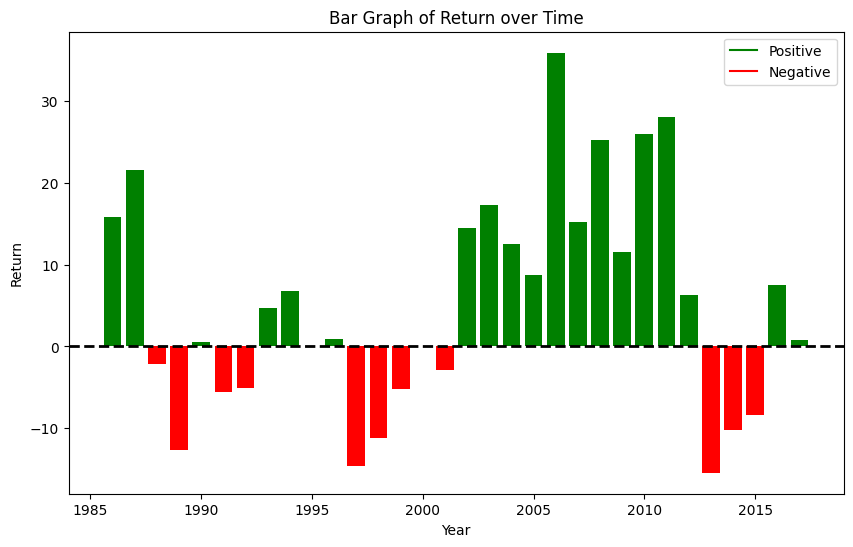

In [32]:
#Extract Year value from date column for easy visualization
gold_annual_returns['Year'] = gold_annual_returns['date'].dt.year


#Plotting a bar graph to represent +ve and -ve returns across the years
plt.figure(figsize=(10, 6))
bars = plt.bar(gold_annual_returns['Year'], gold_annual_returns['Return'], color=['g' if x >= 0 else 'r' for x in gold_annual_returns['Return']])
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0

# Customize labels and title
plt.xlabel('Year')
plt.ylabel('Return')
plt.title('Bar Graph of Return over Time')

# Add legend for positive and negative values
plt.legend(handles=[plt.Line2D([0], [0], color='g', label='Positive'),
                    plt.Line2D([0], [0], color='r', label='Negative')])

# Show the plot
plt.show()


In [33]:
#Convert the 'date' column into date and time values
historical_sensexData['date'] = pd.to_datetime(historical_sensexData['date'])

#Selecting the time range as 1985 to 2017 to maintain uniformity among datasets
historical_sensexData = historical_sensexData.loc[(historical_sensexData['date'].dt.year >= 1985) & (historical_sensexData['date'].dt.year < 2018)]
sensexData_annual_returns = historical_sensexData.set_index('date').resample('Y').sum()
sensexData_annual_returns = sensexData_annual_returns.reset_index()
sensexData_annual_returns

,date,Open,High,Low,Close
0,1985-12-31,0.00,0.00,0.00,5127.25
1,1986-12-31,0.00,0.00,0.00,6992.10
2,1987-12-31,0.00,0.00,0.00,5734.79
3,1988-12-31,0.00,0.00,0.00,6774.29
4,1989-12-31,0.00,0.00,0.00,8723.61
5,1990-12-31,0.00,0.00,0.00,11893.34
6,1991-12-31,17374.53,18821.20,10581.52,18199.00
7,1992-12-31,31777.99,39683.95,18785.73,36599.48
8,1993-12-31,30446.88,33096.97,26464.94,31212.05
9,1994-12-31,48532.81,51161.41,38492.25,49103.63


In [34]:
# Calculate annual Returns
sensexData_annual_returns['Return'] = sensexData_annual_returns['Close'].pct_change() * 100
sensexData_annual_returns = sensexData_annual_returns.reset_index()
sensexData_annual_returns

,index,date,Open,High,Low,Close,Return
0,0,1985-12-31,0.00,0.00,0.00,5127.25,NaN
1,1,1986-12-31,0.00,0.00,0.00,6992.10,36.371349
2,2,1987-12-31,0.00,0.00,0.00,5734.79,-17.981865
3,3,1988-12-31,0.00,0.00,0.00,6774.29,18.126209
4,4,1989-12-31,0.00,0.00,0.00,8723.61,28.775266
5,5,1990-12-31,0.00,0.00,0.00,11893.34,36.335072
6,6,1991-12-31,17374.53,18821.20,10581.52,18199.00,53.018412
7,7,1992-12-31,31777.99,39683.95,18785.73,36599.48,101.107094
8,8,1993-12-31,30446.88,33096.97,26464.94,31212.05,-14.719963
9,9,1994-12-31,48532.81,51161.41,38492.25,49103.63,57.322669


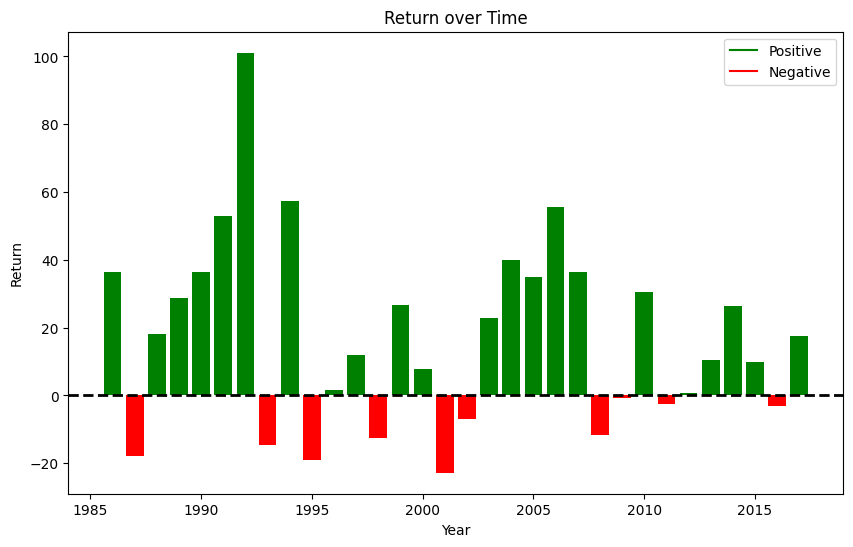

In [35]:
#Extract Year value from date column for easy visualization
sensexData_annual_returns['Year'] = sensexData_annual_returns['date'].dt.year


#Plotting a bar graph to represent +ve and -ve returns across the years
plt.figure(figsize=(10, 6))
bars = plt.bar(sensexData_annual_returns['Year'], sensexData_annual_returns['Return'], color=['g' if x >= 0 else 'r' for x in sensexData_annual_returns['Return']])
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0

# Customize labels and title
plt.xlabel('Year')
plt.ylabel('Return')
plt.title('Return over Time')

# Add legend for positive and negative values
plt.legend(handles=[plt.Line2D([0], [0], color='g', label='Positive'),
                    plt.Line2D([0], [0], color='r', label='Negative')])

# Show the plot
plt.show()

In [36]:

historical_SPData['date'] = pd.to_datetime(historical_SPData['date'])
historical_SPData = historical_SPData.loc[(historical_SPData['date'].dt.year >= 1985) & (historical_SPData['date'].dt.year < 2018)]
SPData_annual_returns = historical_SPData.set_index('date').resample('Y').sum()
SPData_annual_returns = SPData_annual_returns.reset_index()
SPData_annual_returns

,date,Open,High,Low,Close,Adj Close,Volume
0,1985-12-31,2223.500016,2297.220001,2184.360017,2267.600022,2267.600022,2.751006e+10
1,1986-12-31,2834.669982,2939.240005,2733.570008,2867.049987,2867.049987,3.567949e+10
2,1987-12-31,3425.419952,3612.259978,3226.290025,3431.899979,3431.899979,4.779846e+10
3,1988-12-31,3185.970002,3285.070037,3087.870055,3216.610016,3216.610016,4.084802e+10
4,1989-12-31,3840.100006,3974.750030,3754.610017,3915.769958,3915.769958,4.169559e+10
5,1990-12-31,4015.419984,4149.859985,3853.139985,3992.159974,3992.159974,3.968273e+10
6,1991-12-31,4491.409973,4658.070008,4364.409972,4578.409973,4578.409973,4.533865e+10
7,1992-12-31,4986.700043,5076.319949,4888.299987,5005.390014,5005.390014,5.131460e+10
8,1993-12-31,5410.860017,5502.280001,5318.049987,5441.430024,5441.430024,6.697219e+10
9,1994-12-31,5534.910004,5632.100006,5375.709932,5527.969970,5527.969970,7.344834e+10


In [37]:
# Calculate annual returns
SPData_annual_returns['Return'] = SPData_annual_returns['Close'].pct_change() * 100
SPData_annual_returns = SPData_annual_returns.reset_index()
SPData_annual_returns


,index,date,Open,High,Low,Close,Adj Close,Volume,Return
0,0,1985-12-31,2223.500016,2297.220001,2184.360017,2267.600022,2267.600022,2.751006e+10,NaN
1,1,1986-12-31,2834.669982,2939.240005,2733.570008,2867.049987,2867.049987,3.567949e+10,26.435437
2,2,1987-12-31,3425.419952,3612.259978,3226.290025,3431.899979,3431.899979,4.779846e+10,19.701435
3,3,1988-12-31,3185.970002,3285.070037,3087.870055,3216.610016,3216.610016,4.084802e+10,-6.273200
4,4,1989-12-31,3840.100006,3974.750030,3754.610017,3915.769958,3915.769958,4.169559e+10,21.735925
5,5,1990-12-31,4015.419984,4149.859985,3853.139985,3992.159974,3992.159974,3.968273e+10,1.950830
6,6,1991-12-31,4491.409973,4658.070008,4364.409972,4578.409973,4578.409973,4.533865e+10,14.685033
7,7,1992-12-31,4986.700043,5076.319949,4888.299987,5005.390014,5005.390014,5.131460e+10,9.325946
8,8,1993-12-31,5410.860017,5502.280001,5318.049987,5441.430024,5441.430024,6.697219e+10,8.711409
9,9,1994-12-31,5534.910004,5632.100006,5375.709932,5527.969970,5527.969970,7.344834e+10,1.590390


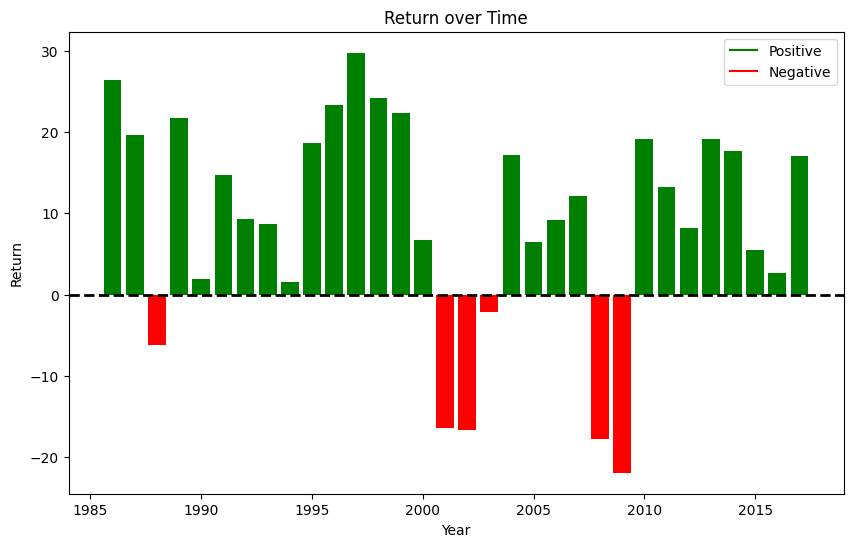

In [38]:
#Extract Year value from date column for easy visualization
SPData_annual_returns['Year'] = SPData_annual_returns['date'].dt.year


# Plot a bar graph with different colors for positive and negative values
plt.figure(figsize=(10, 6))
bars = plt.bar(SPData_annual_returns['Year'], SPData_annual_returns['Return'], color=['g' if x >= 0 else 'r' for x in SPData_annual_returns['Return']])
plt.axhline(0, color='black', linestyle='--', linewidth=2)  # Add a horizontal line at y=0

# Customize labels and title
plt.xlabel('Year')
plt.ylabel('Return')
plt.title('Return over Time')

# Add legend for positive and negative values
plt.legend(handles=[plt.Line2D([0], [0], color='g', label='Positive'),
                    plt.Line2D([0], [0], color='r', label='Negative')])

# Show the plot
plt.show()

In [39]:
historical_SPData_df

,date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,167.199997,180.270004,163.360001,179.630005,179.630005,2.673710e+09
1,1985-01-02,179.630005,183.949997,177.750000,181.179993,181.179993,2.194620e+09
2,1985-01-03,181.179993,183.889999,176.529999,180.660004,180.660004,2.153090e+09
3,1985-01-04,180.660004,183.610001,177.860001,179.830002,179.830002,1.981880e+09
4,1985-01-05,179.830002,189.979996,178.350006,189.550003,189.550003,2.350340e+09
...,...,...,...,...,...,...,...
463,2023-01-08,4578.830078,4584.620117,4335.310059,4507.660156,4507.660156,8.684082e+10
464,2023-01-09,4530.600098,4541.250000,4238.629883,4288.049805,4288.049805,7.348298e+10
465,2023-01-10,4284.520020,4393.569824,4103.779785,4193.799805,4193.799805,8.351946e+10
466,2023-01-11,4201.270020,4587.640137,4197.740234,4567.799805,4567.799805,8.097057e+10


In [40]:
historical_sensexData_df

,date,Open,High,Low,Close
0,1980-01-01,NaN,NaN,NaN,123.54
1,1980-01-02,NaN,NaN,NaN,128.21
2,1980-01-03,NaN,NaN,NaN,128.57
3,1980-01-04,NaN,NaN,NaN,127.25
4,1980-01-05,NaN,NaN,NaN,125.97
...,...,...,...,...,...
523,2023-01-08,66532.98,66658.12,64723.63,64831.41
524,2023-01-09,64855.51,67927.23,64818.37,65828.41
525,2023-01-10,65813.42,66592.16,63092.98,63874.93
526,2023-01-11,63829.87,67069.89,63550.46,66988.44


In [41]:
historical_goldData_df

,id,date,price
0,1,1950-01-02,34.730
1,2,1950-01-03,34.730
2,3,1950-01-04,34.730
3,4,1950-01-05,34.730
4,5,1950-01-06,34.730
...,...,...,...
812,813,2017-01-10,1280.677
813,814,2017-01-11,1283.189
814,815,2017-01-12,1265.674
815,816,2018-01-01,1332.809


#

Calculating Volatility of each asset

In [42]:
historical_SPData_df = historical_goldData.rename(columns={'Close':'price'})
historical_sensexData_df = historical_goldData.rename(columns={'Close':'price'})

In [43]:
historical_SPData_df

,id,date,price
419,420,1985-01-01,302.852
420,421,1985-01-02,299.833
421,422,1985-01-03,303.205
422,423,1985-01-04,324.883
423,424,1985-01-05,316.395
...,...,...,...
810,811,2017-01-08,1281.720
811,812,2017-01-09,1317.045
812,813,2017-01-10,1280.677
813,814,2017-01-11,1283.189


In [44]:
historical_goldData_df['date'] = pd.to_datetime(historical_goldData_df['date'])
historical_goldData_df = historical_goldData_df[(historical_goldData_df['date'].dt.year >= 1985) & (historical_goldData_df['date'].dt.year < 2018)]

# Sort the DataFrame by date (if not already sorted)
historical_goldData_df = historical_goldData_df.sort_values(by='date')

# Calculate daily returns
historical_goldData_df['monthly_return'] = historical_goldData_df['price'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_gold = historical_goldData_df['monthly_return'].std()

print(f"Volatility of Gold: {volatility_gold:.4f}")

Volatility of Gold: 0.0359


In [48]:
historical_sensexData_df['date'] = pd.to_datetime(historical_sensexData_df['date'])
historical_sensexData_df = historical_sensexData.loc[(historical_sensexData_df['date'].dt.year >= 1985) & (historical_sensexData_df['date'].dt.year < 2018)]

# Sort the DataFrame by date (if not already sorted)
historical_sensexData_df = historical_sensexData_df.sort_values(by='date')

# Calculate daily returns
historical_sensexData_df['monthly_return'] = historical_sensexData_df['price'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_sensex = historical_sensexData_df['monthly_return'].std()

print(f"Volatility of Sensex: {volatility_sensex:.4f}")

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [47]:
historical_SPData_df['date'] = pd.to_datetime(historical_SPData['date'])
historical_SPData_df = historical_SPData_df.loc[(historical_SPData_df['date'].dt.year >= 1985) & (historical_SPData_df['date'].dt.year < 2018)]
# Sort the DataFrame by date (if not already sorted)
historical_SPData_df = historical_SPData_df.sort_values(by='date')

# Calculate daily returns
historical_SPData_df['monthly_return'] = historical_SPData_df['price'].pct_change()

# Calculate volatility (standard deviation of monthly returns)
volatility_SP = historical_SPData_df['monthly_return'].std()
print(f"Volatility of S&P500: {volatility_SP:.4f}")

Volatility of S&P500: nan


In [ ]:
print(f"Volatility of Gold: {volatility_gold:.4f}")
print(f"Volatility of Sensex: {volatility_sensex:.4f}")
print(f"Volatility of S&P500: {volatility_SP:.4f}")